In [3]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
f=open('hurriyet.txt','r',encoding='utf8')
text=f.read()
t_list=text.split('\n')

corpus=[]
for cumle in t_list:
    corpus.append(cumle.split())

In [6]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [7]:
model=Word2Vec(corpus,size=100,window=5,min_count=5,sg=1)

In [8]:
model.wv['ankara']

array([-0.67800885, -0.12658665,  0.14535974,  0.01220748,  0.09506673,
       -0.16113728, -0.6349798 , -0.36055058, -0.08078657,  0.1656183 ,
       -0.19285135,  0.07358872, -0.15029703, -0.38167688, -0.17135367,
       -0.06337012,  0.29332405, -0.16760196,  0.23755561, -0.6918061 ,
       -0.4329341 ,  0.22158867, -0.27611524, -0.11763256,  0.31745028,
        0.5892657 ,  0.6850007 , -0.22127011, -0.6370152 ,  0.1534757 ,
       -0.3878891 ,  0.06569599, -0.39575255,  0.00501264,  0.415241  ,
       -0.33043906,  0.51188   ,  0.8327222 ,  0.3574227 , -0.43168506,
        0.69189674, -0.13689812, -0.4303612 ,  0.66397184, -0.35077626,
       -0.46253443, -0.13809423,  0.09117603, -0.5303647 ,  0.340303  ,
       -0.44876364, -0.23278894, -0.24799626, -0.5541449 ,  0.18314384,
       -0.08345373,  0.09284997, -0.31596205, -0.04646291, -0.20718545,
       -0.0492822 , -0.30582526, -0.27417266, -0.07491313, -0.16266227,
        0.06221991,  0.12328633, -0.43225774, -0.20366505,  0.35

In [9]:
model.wv.most_similar('hollanda')

[('danimarka', 0.807255744934082),
 ('belçika', 0.7948070764541626),
 ('avusturya', 0.7828564643859863),
 ('almanya', 0.7652080655097961),
 ('kanada', 0.7570133209228516),
 ('fransa', 0.7500192523002625),
 ('italya', 0.7492040395736694),
 ('finlandiya', 0.7491670846939087),
 ('avustralya', 0.7427840232849121),
 ('letonya', 0.7358872890472412)]

In [10]:
model.save('word2vecc.model')

In [12]:
model=Word2Vec.load('word2vecc.model')

In [18]:
def closeswords_tsneplot(model,word):
    word_vectors=np.empty((0,100))
    word_labels=[word] 
    close_words=model.wv.most_similar(word)
    word_vectors=np.append(word_vectors,np.array([model.wv[word]]),axis=0)
    for w,_ in close_words:
        word_labels.append(w)
        word_vectors=np.append(word_vectors,np.array([model.wv[w]]),axis=0)
    tsne=TSNE(random_state=0)
    Y=tsne.fit_transform(word_vectors)
    
    x_coords=Y[:,0]
    y_coords=Y[:,1]
   
    plt.scatter(x_coords,y_coords)
    for label, x, y in zip(word_labels,x_coords,y_coords):
        plt.annotate(label,xy=(x,y),xytext=(5,-2),textcoords='offset points')
    
    plt.show()
        
    

C:\Users\onura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\onura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


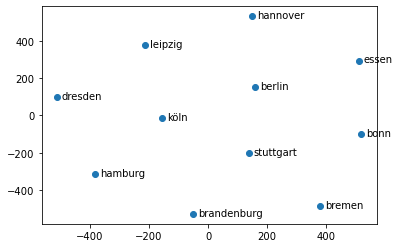

In [19]:
closeswords_tsneplot(model,'berlin')